In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#life expectancy (years)
life = pd.read_csv('./treated_data/life_expectancy.csv')
life.drop(columns=['Unnamed: 0'], inplace=True)
life.rename(columns={'Year': 'year'}, inplace=True)
print(len(life.country.unique()))
print(life.shape)
life.head()

183
(2013, 3)


,country,year,life_expectancy
0,Afghanistan,2000,51.6
1,Afghanistan,2001,51.7
2,Afghanistan,2002,52.4
3,Afghanistan,2003,53.0
4,Afghanistan,2004,53.5


In [3]:
#income(gross)/capita ($US, inflation-adjusted)
income = pd.read_csv('./treated_data/income.csv')
income.drop(columns=['Unnamed: 0'], inplace=True)
print(len(income.country.unique()))
print(income.shape)
income.head()

183
(2013, 3)


,country,year,income
0,Afghanistan,2000,NaN
1,Afghanistan,2001,NaN
2,Afghanistan,2002,365.0
3,Afghanistan,2003,377.0
4,Afghanistan,2004,364.0


In [4]:
#CO2 emissions (tonnes per person)
co2 = pd.read_csv('./treated_data/co2_emissions(tonnes_person).csv')
co2.drop(columns=['Unnamed: 0'], inplace=True)
print(len(co2.country.unique()))
print(co2.shape)
co2.head()

187
(2057, 3)


,country,year,co2_emissions(tonnes/person)
0,Afghanistan,2000,0.0385
1,Afghanistan,2001,0.0390
2,Afghanistan,2002,0.0487
3,Afghanistan,2003,0.0518
4,Afghanistan,2004,0.0394


In [5]:
#Total health spending per person ($US)
health_spending = pd.read_csv('./treated_data/total_health_spending_per_person_us.csv')
health_spending.drop(columns=['Unnamed: 0'], inplace=True)
print(len(health_spending.country.unique()))
print(health_spending.shape)
health_spending.head()

182
(2002, 3)


,country,year,total_health_spending
0,Afghanistan,2000,NaN
1,Afghanistan,2001,NaN
2,Afghanistan,2002,14.8
3,Afghanistan,2003,18.3
4,Afghanistan,2004,20.7


In [6]:
#Government spending on health per person ($US)
gov = pd.read_csv('./treated_data/government_health_spending_per_person_us.csv')
gov.drop(columns=['Unnamed: 0'], inplace=True)
print(len(gov.country.unique()))
print(gov.shape)
gov.head()

184
(2024, 3)


,country,year,gov_health_spending
0,Afghanistan,2000,NaN
1,Afghanistan,2001,NaN
2,Afghanistan,2002,0.833
3,Afghanistan,2003,1.250
4,Afghanistan,2004,1.610


In [7]:
#Food consumption: how many kcal per day per person
food = pd.read_csv('./treated_data/kcal_per_person_day')
food.drop(columns=['Unnamed: 0'], inplace=True)
print(len(food.country.unique()))
print(food.shape)
food.head()

167
(1837, 3)


,country,year,kcal_day
0,Afghanistan,2000,1790.0
1,Afghanistan,2001,1740.0
2,Afghanistan,2002,1830.0
3,Afghanistan,2003,1890.0
4,Afghanistan,2004,1970.0


In [8]:
#Sugar consumption: grams per day per person
sugar = pd.read_csv('./treated_data/sugar_per_person_g_per_day.csv')
sugar.drop(columns=['Unnamed: 0'], inplace=True)
print(len(sugar.country.unique()))
print(sugar.shape)
sugar.head()

167
(1837, 3)


,country,year,sugar_g_day
0,Afghanistan,2000,8.74
1,Afghanistan,2001,8.40
2,Afghanistan,2002,9.46
3,Afghanistan,2003,12.20
4,Afghanistan,2004,15.50


In [9]:
#mean years of schooling per person, alchool consumption, BMI (body mass index)
school_alchool_bmi = pd.read_csv('./treated_data/schooling_alcohol_BMI.csv')
school_alchool_bmi.drop(columns=['Unnamed: 0','Life expectancy '], inplace=True)
school_alchool_bmi.rename(columns={'Year': 'year'}, inplace=True)
print(len(school_alchool_bmi.country.unique()))
print(school_alchool_bmi.shape)
school_alchool_bmi.head()

183
(2013, 5)


,country,year,Schooling,Alcohol,BMI
0,Afghanistan,2000,5.5,0.01,12.2
1,Afghanistan,2001,5.9,0.01,12.6
2,Afghanistan,2002,6.2,0.01,13.0
3,Afghanistan,2003,6.5,0.01,13.4
4,Afghanistan,2004,6.8,0.02,13.8


In [11]:
#plot = school_alchool_bmi.groupby['country']

In [12]:
#Fertility: children per woman
fertility = pd.read_csv('./treated_data/children_per_woman_total.csv')
fertility.drop(columns=['Unnamed: 0'], inplace=True)
print(len(fertility.country.unique()))
print(fertility.shape)
fertility.head()

184
(2024, 3)


,country,year,children/woman
0,Afghanistan,2000,7.49
1,Afghanistan,2001,7.39
2,Afghanistan,2002,7.27
3,Afghanistan,2003,7.14
4,Afghanistan,2004,6.99


In [13]:
data_frames = [life, income, co2, health_spending, gov, food, sugar, school_alchool_bmi, fertility]

In [14]:
from functools import reduce
df = reduce(lambda  left,right: pd.merge(left,right,on=['country','year'],
                                            how='inner'), data_frames)
df.head()

,country,year,life_expectancy,income,co2_emissions(tonnes/person),total_health_spending,gov_health_spending,kcal_day,sugar_g_day,Schooling,Alcohol,BMI,children/woman
0,Afghanistan,2000,51.6,NaN,0.0385,NaN,NaN,1790.0,8.74,5.5,0.01,12.2,7.49
1,Afghanistan,2001,51.7,NaN,0.0390,NaN,NaN,1740.0,8.40,5.9,0.01,12.6,7.39
2,Afghanistan,2002,52.4,365.0,0.0487,14.8,0.833,1830.0,9.46,6.2,0.01,13.0,7.27
3,Afghanistan,2003,53.0,377.0,0.0518,18.3,1.250,1890.0,12.20,6.5,0.01,13.4,7.14
4,Afghanistan,2004,53.5,364.0,0.0394,20.7,1.610,1970.0,15.50,6.8,0.02,13.8,6.99


In [15]:
df.shape

(1793, 13)

In [16]:
df.isnull().sum()

country                          0
year                             0
life_expectancy                  0
income                          13
co2_emissions(tonnes/person)     2
total_health_spending           14
gov_health_spending             15
kcal_day                        12
sugar_g_day                     12
Schooling                        0
Alcohol                          1
 BMI                            11
children/woman                   0
dtype: int64

In [17]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

country                         0
year                            0
life_expectancy                 0
income                          0
co2_emissions(tonnes/person)    0
total_health_spending           0
gov_health_spending             0
kcal_day                        0
sugar_g_day                     0
Schooling                       0
Alcohol                         0
 BMI                            0
children/woman                  0
dtype: int64

In [18]:
df.shape

(1742, 13)

In [19]:
df.dtypes

country                          object
year                              int64
life_expectancy                 float64
income                          float64
co2_emissions(tonnes/person)    float64
total_health_spending           float64
gov_health_spending             float64
kcal_day                        float64
sugar_g_day                     float64
Schooling                       float64
Alcohol                         float64
 BMI                            float64
children/woman                  float64
dtype: object

In [20]:
df_model = df.drop(columns=['year','country'])
df_model.columns

Index(['life_expectancy', 'income', 'co2_emissions(tonnes/person)',
       'total_health_spending', 'gov_health_spending', 'kcal_day',
       'sugar_g_day', 'Schooling', 'Alcohol', ' BMI ', 'children/woman'],
      dtype='object')

In [21]:
df_heatmap = df_model.rename(columns={'life_expectancy':'life_exp','co2_emissions(tonnes/person)':'co2',
                                     'total_health_spending':'health_spending', 'gov_health_spending':'gov_spending',
                                     'kcal_day':'kcal','sugar_g_day':'sugar',' BMI ':'BMI'})
df_heatmap.head()

,life_exp,income,co2,health_spending,gov_spending,kcal,sugar,Schooling,Alcohol,BMI,children/woman
2,52.4,365.0,0.0487,14.8,0.833,1830.0,9.46,6.2,0.01,13.0,7.27
3,53.0,377.0,0.0518,18.3,1.250,1890.0,12.20,6.5,0.01,13.4,7.14
4,53.5,364.0,0.0394,20.7,1.610,1970.0,15.50,6.8,0.02,13.8,6.99
5,53.9,389.0,0.0529,21.9,2.520,1950.0,18.60,7.9,0.02,14.2,6.83
6,54.1,398.0,0.0637,23.8,2.810,1970.0,19.70,8.1,0.03,14.7,6.65


In [22]:
df_heatmap_corr = df_heatmap.corr()
df_heatmap_corr

,life_exp,income,co2,health_spending,gov_spending,kcal,sugar,Schooling,Alcohol,BMI,children/woman
life_exp,1.000000,0.573254,0.500987,0.517279,0.504397,0.701387,0.679190,0.719239,0.414651,0.568092,-0.782534
income,0.573254,1.000000,0.696246,0.903439,0.907161,0.638948,0.496204,0.587159,0.495806,0.410591,-0.448267
co2,0.500987,0.696246,1.000000,0.529186,0.509404,0.601877,0.497473,0.503261,0.340874,0.416509,-0.489197
health_spending,0.517279,0.903439,0.529186,1.000000,0.980455,0.600020,0.462755,0.544220,0.502169,0.376909,-0.391248
gov_spending,0.504397,0.907161,0.509404,0.980455,1.000000,0.582022,0.431302,0.540696,0.490420,0.364722,-0.376329
kcal,0.701387,0.638948,0.601877,0.600020,0.582022,1.000000,0.645776,0.698176,0.490931,0.601297,-0.670754
sugar,0.679190,0.496204,0.497473,0.462755,0.431302,0.645776,1.000000,0.650790,0.455353,0.579470,-0.673761
Schooling,0.719239,0.587159,0.503261,0.544220,0.540696,0.698176,0.650790,1.000000,0.579054,0.594438,-0.747047
Alcohol,0.414651,0.495806,0.340874,0.502169,0.490420,0.490931,0.455353,0.579054,1.000000,0.389184,-0.533316
BMI,0.568092,0.410591,0.416509,0.376909,0.364722,0.601297,0.579470,0.594438,0.389184,1.000000,-0.578123


In [23]:
heatmap = df_heatmap_corr.style.background_gradient(cmap='RdYlGn',axis=None).set_precision(2)
heatmap

,life_exp,income,co2,health_spending,gov_spending,kcal,sugar,Schooling,Alcohol,BMI,children/woman
life_exp,1,0.57,0.5,0.52,0.5,0.7,0.68,0.72,0.41,0.57,-0.78
income,0.57,1,0.7,0.9,0.91,0.64,0.5,0.59,0.5,0.41,-0.45
co2,0.5,0.7,1,0.53,0.51,0.6,0.5,0.5,0.34,0.42,-0.49
health_spending,0.52,0.9,0.53,1,0.98,0.6,0.46,0.54,0.5,0.38,-0.39
gov_spending,0.5,0.91,0.51,0.98,1,0.58,0.43,0.54,0.49,0.36,-0.38
kcal,0.7,0.64,0.6,0.6,0.58,1,0.65,0.7,0.49,0.6,-0.67
sugar,0.68,0.5,0.5,0.46,0.43,0.65,1,0.65,0.46,0.58,-0.67
Schooling,0.72,0.59,0.5,0.54,0.54,0.7,0.65,1,0.58,0.59,-0.75
Alcohol,0.41,0.5,0.34,0.5,0.49,0.49,0.46,0.58,1,0.39,-0.53
BMI,0.57,0.41,0.42,0.38,0.36,0.6,0.58,0.59,0.39,1,-0.58


In [24]:
#sns.pairplot(df_model)

In [25]:
df_model.describe()

,life_expectancy,income,co2_emissions(tonnes/person),total_health_spending,gov_health_spending,kcal_day,sugar_g_day,Schooling,Alcohol,BMI,children/woman
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,69.097359,12159.945465,4.481198,762.148479,534.237984,2760.189437,83.468347,11.896843,5.207262,37.912113,3.012445
std,9.415030,17835.201434,5.518953,1403.569051,1048.388872,475.999530,43.093455,3.261131,4.026426,19.201851,1.615726
min,32.100000,194.000000,0.018700,2.620000,0.270000,1780.000000,3.290000,0.000000,0.010000,1.000000,1.120000
25%,62.800000,1270.000000,0.668250,46.525000,18.525000,2370.000000,44.725000,10.100000,1.605000,19.000000,1.750000
50%,71.900000,4190.000000,2.300000,178.000000,99.300000,2760.000000,85.200000,12.200000,4.400000,43.850000,2.505000
75%,76.300000,13100.000000,6.450000,615.750000,409.000000,3130.000000,115.000000,14.000000,8.400000,55.200000,3.980000
max,82.800000,112000.000000,36.100000,8360.000000,6940.000000,3830.000000,194.000000,20.700000,17.870000,75.200000,7.680000


In [26]:
df_model.shape #(1742, 11)

(1742, 11)

In [27]:
df_model.to_csv('/Users/filipalopes/Ironhack/PROJECTS/Supervised-Learning-Project/gapminder_data/treated_data/df_model.csv')


In [41]:
df_model.head()

,life_expectancy,income,co2_emissions(tonnes/person),total_health_spending,gov_health_spending,kcal_day,sugar_g_day,Schooling,Alcohol,BMI,children/woman
2,52.4,365.0,0.0487,14.8,0.833,1830.0,9.46,6.2,0.01,13.0,7.27
3,53.0,377.0,0.0518,18.3,1.250,1890.0,12.20,6.5,0.01,13.4,7.14
4,53.5,364.0,0.0394,20.7,1.610,1970.0,15.50,6.8,0.02,13.8,6.99
5,53.9,389.0,0.0529,21.9,2.520,1950.0,18.60,7.9,0.02,14.2,6.83
6,54.1,398.0,0.0637,23.8,2.810,1970.0,19.70,8.1,0.03,14.7,6.65


In [29]:
y = df_model['life_expectancy']
X = df_model.drop(['life_expectancy'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [30]:
#regr = LinearRegression()
#model = regr.fit(X, y)
#acc = model.score(X_test,y_test)*100
#print(f"Model (Linear Regression) Test Accuracy {round(acc, 2)}%")

In [31]:
#from sklearn.neighbors import KNeighborsRegressor
#knnr = KNeighborsRegressor(n_neighbors = 3)
#model = knnr.fit(X_train, y_train)
#acc = model.score(X_test,y_test)*100
#print(f"Model (KNN) Test Accuracy {round(acc, 2)}%")

In [32]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state = 7)
model = regr.fit(X_train, y_train)
acc = model.score(X_test,y_test)*100
print(f"Model (Decision Tree) Test Accuracy {round(acc, 2)}%")

Model (Decision Tree) Test Accuracy 91.33%


In [33]:
y_pred = regr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_error
print(r2_score(y_test, y_pred)) #good fit?
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9133220001398492
7.285243553008597
1.2535816618911175


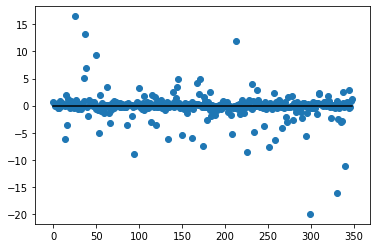

In [34]:
x_plot = list(range(len(y_test)))
x = [0*i for i in range(len(y_test))]
plt.plot(x, color='black')
plt.scatter(x_plot, y_pred - y_test)
plt.show()

In [35]:
#cross validation - this doesn't make sense. can actually apply cv on a regression model
from sklearn.model_selection import cross_val_score 
cv_results = cross_val_score(regr, X, y, cv=5) 
cv_results

array([0.53156383, 0.72356476, 0.5277574 , 0.39945498, 0.26067943])

In [36]:
#my_predictors = [12159.945465, 4.481198, 762.148479, 534.237984, 2760.189437, 83.468347, 11.896843, 5.207262, 37.912113, 3.012445]
#my_predictors = [194.000000, 0.018700, 2.620000, 0.270000, 1780.000000, 3.290000, 0.000000, 0.010000, 1.000000, 7.120000]
#my_predictors #values
#parameters = list(X_test.columns) 
#parameters #keys
#my_data = dict(zip(parameters, my_predictors))
#my_data
#my_df = pd.DataFrame(my_data, index=[0])
#my_df
#my_y_pred = regr.predict(my_df)
#my_y_pred

In [37]:
'''
BMI Categories: 
Underweight = <18.5
Normal weight = 18.5–24.9 
Overweight = 25–29.9 
Obesity = BMI of 30 or greater
'''

'\nBMI Categories: \nUnderweight = <18.5\nNormal weight = 18.5–24.9 \nOverweight = 25–29.9 \nObesity = BMI of 30 or greater\n'

In [39]:
#set for ints
my_predictors = []
while len(my_predictors) < 10:
    parameters=['income','co2_emissions(tonnes/person)','total_health_spending','gov_health_spending','kcal_day','sugar_g_day','Schooling','Alcohol',' BMI ','children/woman']
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    print('\n')
    income = input('Your gross income per year ($US): ')
    my_predictors.append(income)
    co2 = input('Your CO2 emissions/tonnes per year (in 2014 an American produced ~16 tonnes): ')
    my_predictors.append(co2)
    health = input('Your spends on healthcare per year ($US): ')
    my_predictors.append(health)
    gov = input('How much healthcare allowance you receive from the government per year ($US): ')
    my_predictors.append(gov)
    kcal = input('Food intake (calories per day): ')
    my_predictors.append(kcal)
    sugar = input('Sugar intake (grams per day): ')
    my_predictors.append(sugar)
    school = input('Years spent on school+university: ')
    my_predictors.append(school)
    alcohol = input('Your alcohol intake per week (1 beer = 1 unit): ')
    my_predictors.append(alcohol)
    print('Body mass index (BMI):')
    w = float(input('Your weight in kg: '))
    h = float(input('Your height in m: '))
    bmi = w/(h**2)
    print(f'Your BMI is: {round(bmi, 1)}')
    my_predictors.append(bmi)
    fertility = input('How many children you have: ')
    my_predictors.append(fertility)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    my_y_pred = regr.predict(my_df)
    print('\n')
    print(f'Life expectancy: {float(my_y_pred)} years')

































Your gross income per year ($US): 1000000
Your CO2 emissions/tonnes per year (in 2014 an American produced ~16 tonnes): 20
Your spends on healthcare per year ($US): 10000
How much healthcare allowance you receive from the government per year ($US): 599
Food intake (calories per day): 40000
Sugar intake (grams per day): 40
Years spent on school+university: 14
Your alcohol intake per week (1 beer = 1 unit): 3
Body mass index (BMI):
Your weight in kg: 90
Your height in m: 1.85
Your BMI is: 26.3
How many children you have: 1


Life expectancy: 79.8 years
